## This Is Multiple Regression Program. Here we find the maximum profit of startups which is dependent on multiple factors




## 


## Importing All necessary Modules


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

## Importing the Dataset

In [9]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sohanjs111/Machine-Learning/main/Regression/multiple_linear_regression/50_Startups.csv")
print(dataset.shape)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Graph 

### Graph between Marketing Spend and Profit

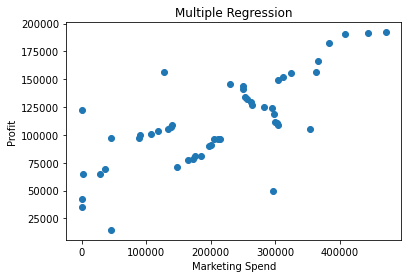

In [3]:
plt.scatter(dataset['Marketing Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

### Graph between Administration Spend and Profit

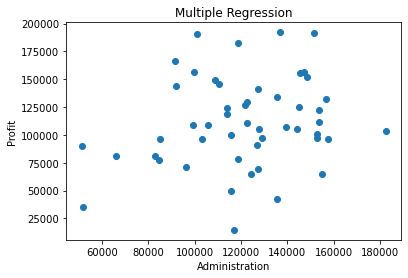

In [6]:
plt.scatter(dataset['Administration'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

### Graph between R&D  Spend and Profit

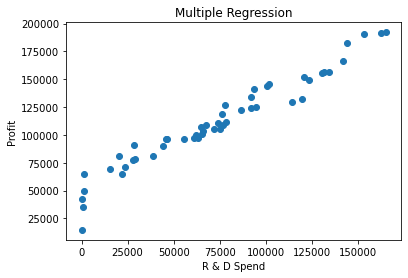

In [7]:
plt.scatter(dataset['R&D Spend'] , dataset['Profit'])
plt.title('Multiple Regression')
plt.xlabel('R & D Spend')
plt.ylabel('Profit')
plt.show()

In [10]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [6]:
# Converting type of columns to category
dataset['State']=dataset['State'].astype('category')

#Assigning numerical values and storing it in another columns
dataset['newstates']=dataset['State'].cat.codes

#Create an instance of One-hot-encoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(dataset[['newstates']]).toarray())
print(enc_data)

#Merge with the dataset
New_df=dataset.join(enc_data)
dataset.head()

      0    1    2
0   0.0  0.0  1.0
1   1.0  0.0  0.0
2   0.0  1.0  0.0
3   0.0  0.0  1.0
4   0.0  1.0  0.0
5   0.0  0.0  1.0
6   1.0  0.0  0.0
7   0.0  1.0  0.0
8   0.0  0.0  1.0
9   1.0  0.0  0.0
10  0.0  1.0  0.0
11  1.0  0.0  0.0
12  0.0  1.0  0.0
13  1.0  0.0  0.0
14  0.0  1.0  0.0
15  0.0  0.0  1.0
16  1.0  0.0  0.0
17  0.0  0.0  1.0
18  0.0  1.0  0.0
19  0.0  0.0  1.0
20  1.0  0.0  0.0
21  0.0  0.0  1.0
22  0.0  1.0  0.0
23  0.0  1.0  0.0
24  0.0  0.0  1.0
25  1.0  0.0  0.0
26  0.0  1.0  0.0
27  0.0  0.0  1.0
28  0.0  1.0  0.0
29  0.0  0.0  1.0
30  0.0  1.0  0.0
31  0.0  0.0  1.0
32  1.0  0.0  0.0
33  0.0  1.0  0.0
34  1.0  0.0  0.0
35  0.0  0.0  1.0
36  0.0  1.0  0.0
37  1.0  0.0  0.0
38  0.0  0.0  1.0
39  1.0  0.0  0.0
40  1.0  0.0  0.0
41  0.0  1.0  0.0
42  1.0  0.0  0.0
43  0.0  0.0  1.0
44  1.0  0.0  0.0
45  0.0  0.0  1.0
46  0.0  1.0  0.0
47  1.0  0.0  0.0
48  0.0  0.0  1.0
49  1.0  0.0  0.0


,R&D Spend,Administration,Marketing Spend,State,Profit,newstates
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


In [7]:
New_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,newstates,0,1,2
0,165349.20,136897.80,471784.10,New York,192261.83,2,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,0,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,2,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0.0,1.0,0.0


In [1]:
# dataset['newyork']=np.where(dataset['State'] == 'New York' , 1, 0)
# dataset['florida']=np.where(dataset['State'] == 'Florida' , 1, 0)
# dataset['California']=np.where(dataset['State'] == 'California' , 1, 0)

dataset['profit'] = dataset['Profit']
dataset.drop(columns=['State'], axis=1,inplace=True)
dataset.drop(columns=['Profit'], axis=1,inplace=True)

NameError: name 'dataset' is not defined

In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,newstates,profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Classifying dataset into two parts 

In [10]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [11]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Classifying the data between test and train

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.25)

## Scaling the data between 0 and 1

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
X_train[0:5]

array([[0.2807759 , 1.        , 0.44680961, 0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.5       ],
       [0.7880179 , 0.88568959, 0.68649342, 0.5       ],
       [0.72539353, 0.98922572, 0.54370828, 0.5       ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        ]])

## Creating Linear Regression Object for creating our model

In [15]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

## Predicting the data

In [16]:
ypred = model.predict(X_test)

In [17]:
print(ypred)

[ 94129.0503278  130413.47487363 131382.32803023  55288.7418894
 189699.90783766 109127.93733545  48070.09480994  86666.90041056
 108351.13600975 176269.05565982  85279.64297448  74879.77739244
 102331.53243675]


## Accuracy of the data

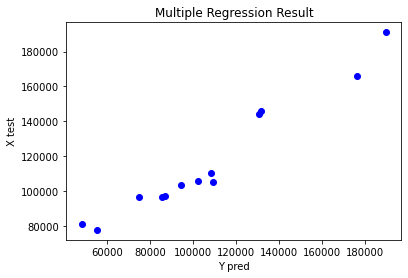

In [18]:
plt.scatter(ypred, y_test, color ='blue')
plt.title('Multiple Regression Result')
plt.xlabel('Y pred')
plt.ylabel('X test')
plt.show()

In [21]:
r2_score(y_test, ypred)

0.7895969603186491